In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import logging.config
%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (18,12)
%config InlineBackend.figure_format = 'png' 


from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [3]:
df=pd.read_excel('data/geo.xlsx')

In [4]:
df.head()

,x,y,comment_class
0,37.612416,55.777454,-1
1,37.612416,55.777454,-1
2,37.603298,55.742108,-1
3,37.558526,55.728758,-1
4,37.566431,55.731794,-1


In [13]:
from sklearn.cluster import KMeans

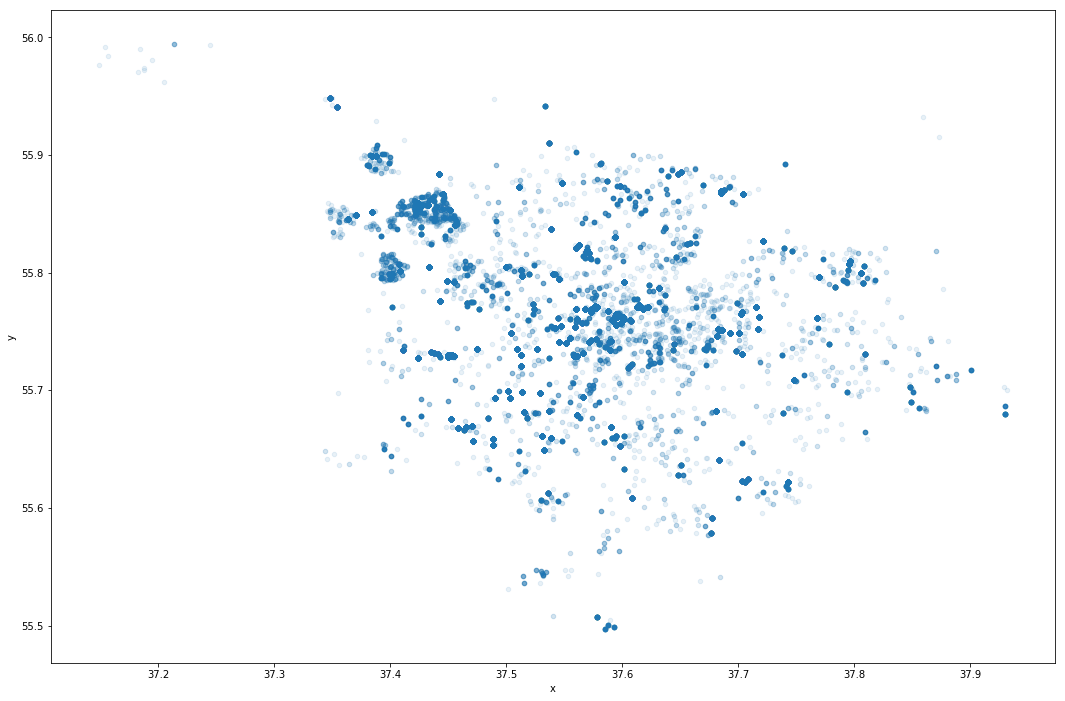

In [14]:
df.plot(kind="scatter", x="x", y="y", alpha=0.1) #сначала просто посмотрим на разброс

In [15]:
X=np.array(df[['x','y']]) #для общего случая
X_pos=np.array(df[df['comment_class']==1][['x','y']]) #для проголосовавших "За"
X_neg=np.array(df[df['comment_class']!=1][['x','y']]) #для проголосовавших "Против"

In [16]:
def SearchClusterNums(data): #загоним в функцию алгоритм возвращения оптимального количества кластеров
    k_inertia = []
    ks = range(5,20)

    for k in ks:
        clf_kmeans = KMeans(n_clusters=k)
        clusters_kmeans = clf_kmeans.fit_predict(data, )
        k_inertia.append(clf_kmeans.inertia_)
    diff = np.diff(k_inertia)
    diff_r = diff[1:] / diff[:-1]
    k_opt = ks[np.argmin(diff_r)+1]
    return k_opt

In [17]:
clust = KMeans(n_clusters=SearchClusterNums(X))

In [18]:
total=clust.fit_predict(X) #прокластеризуем для общего случая

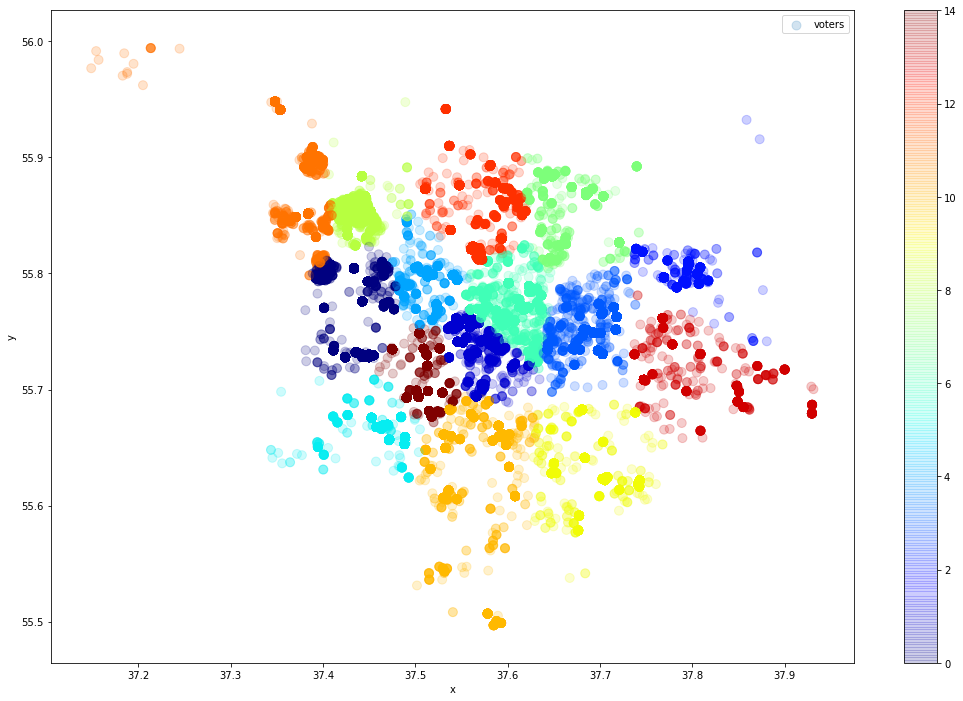

In [19]:
df.plot(kind="scatter",
            x='x',
            y='y',
            c=total,
            alpha=0.2,
            s=80,
            cmap=plt.get_cmap("jet"), 
            colorbar=True,
            sharex=False,
            label="voters")

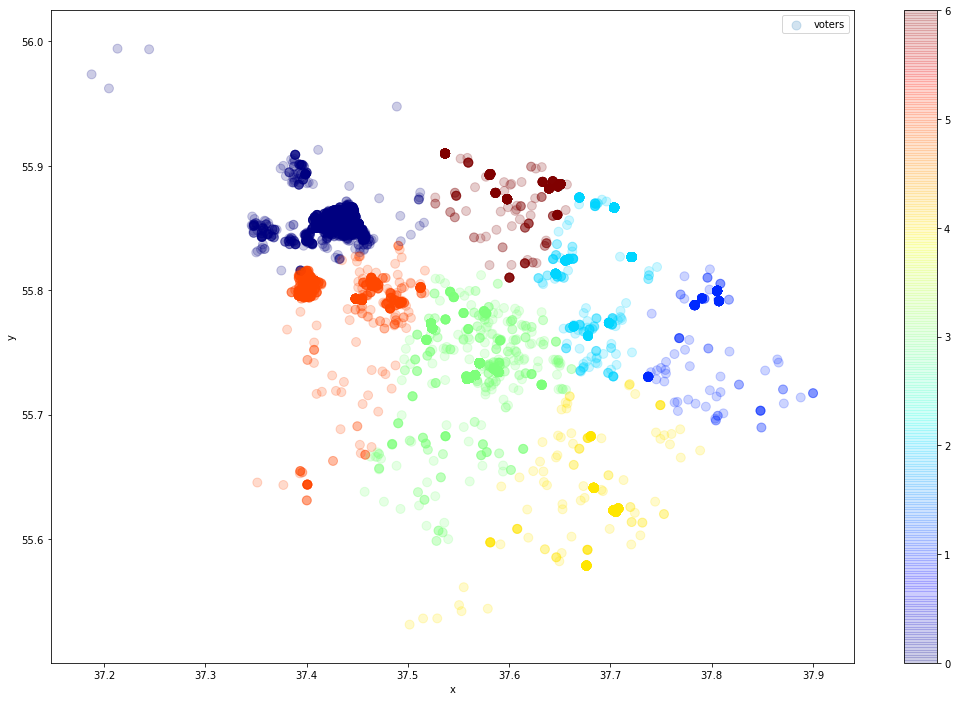

In [45]:
clust_pos = KMeans(n_clusters=SearchClusterNums(X_pos)) #прокластеризуем для проголосовавших "ЗА"
total_pos=clust_pos.fit_predict(X_pos)
df[df['comment_class']==1].plot(kind="scatter",
            x='x',
            y='y',
            c=total_pos,
            alpha=0.2,
            s=80,
            cmap=plt.get_cmap("jet"), 
            colorbar=True,
            sharex=False,
            label="voters")

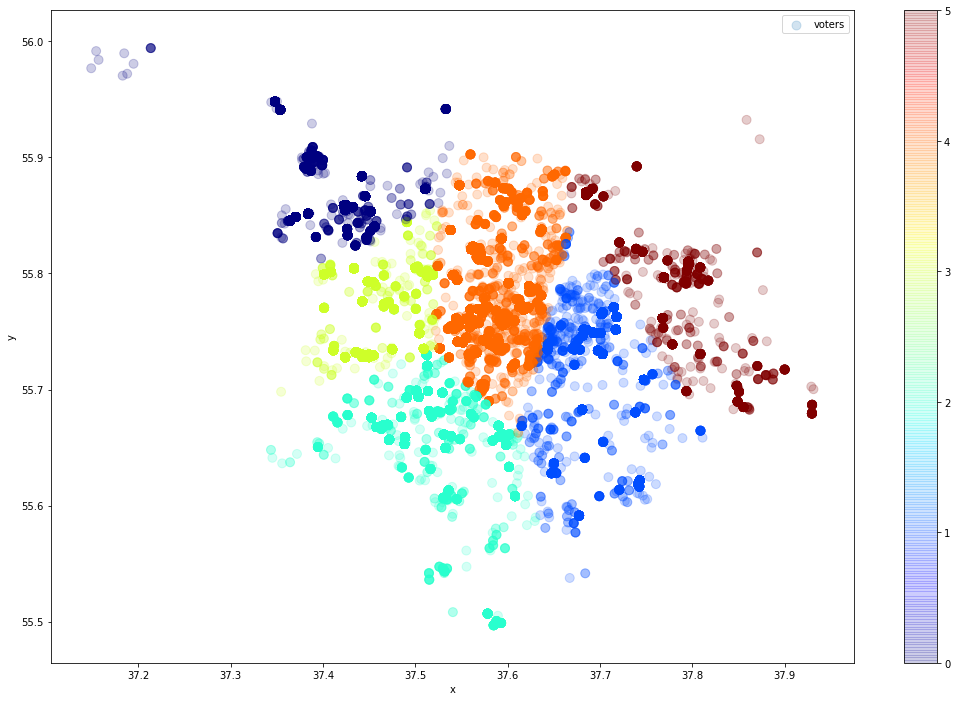

In [47]:
clust_neg = KMeans(n_clusters=SearchClusterNums(X_neg)) #прокластеризуем для проголосовавших "ПРОТИВ"
total_neg=clust_neg.fit_predict(X_neg)
df[df['comment_class']!=1].plot(kind="scatter",
            x='x',
            y='y',
            c=total_neg,
            alpha=0.2,
            s=80,
            cmap=plt.get_cmap("jet"), 
            colorbar=True,
            sharex=False,
            label="voters")